<a href="https://colab.research.google.com/github/jakubtwalczak/Muller_Guido_Introduction_to_ML/blob/main/Rozdzia%C5%82_2_uczenie_nadzorowane_cz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga - do dalszej pracy potrzebować będziemy biblioteki mglearn, która nie znajduje się standardowo w zasobach Google Colab, jednak możemy ją zainstalować w notatniku.

In [1]:
!pip install mglearn

# Ładowanie danych.

Ładujemy syntetyczny zestaw danych **forge**. Zawiera on dwie cechy i zmienną zależną - etykietę.

In [2]:
import mglearn
X, y = mglearn.datasets.make_forge()

In [3]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

Zestaw składa się z 26 punktów danych i 2 cech.

In [5]:
X.shape

(26, 2)

Na wykresie punktowym zobrazujemy podział punktów danych na klasy, przedstawiając klasę 0 jako kropki, a 1 - trójkąty.

Text(0, 0.5, 'Second feature')

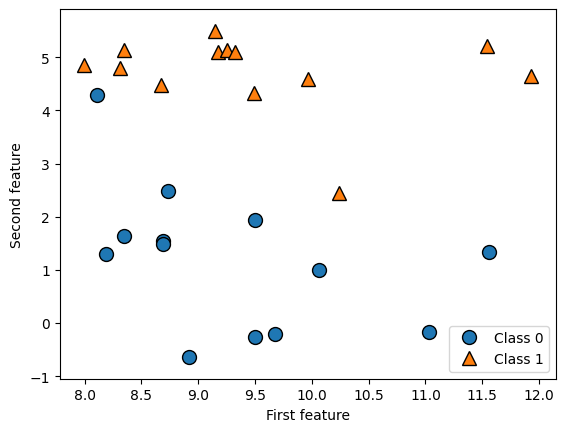

In [6]:
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Innym syntetycznym zestawem danych jest **wave**, który ma jedną zmienną niezależną i ciągłą zmienną docelową. Dobrze nadaje się on do zwizualizowania regresji, w formie wykresu punktowego.

Text(0, 0.5, 'Target')

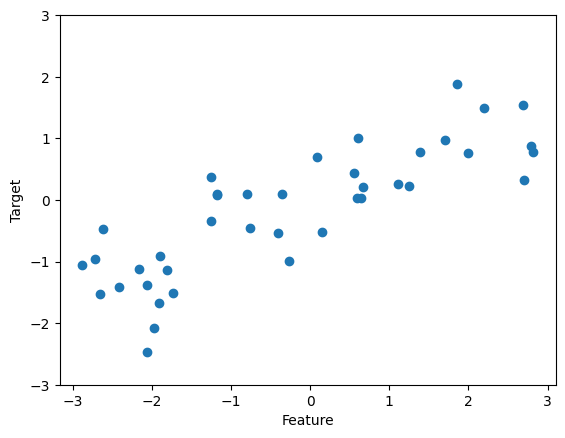

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Takie proste, niskowymiarowe datasety idealnie nadają się do zilustrowania zależności cech, a także sprawdzania na nich działania algorytmów. Na ogół jednak mierzymy się z raportami mającymi więcej niż dwa wymiary, których nie da się tak łatwo przedstawić w formie wykresu.

W bibliotece scikit-learn posiadamy wiele innych, rzeczywistych zestawów. W tym notatniku wykorzystamy dwa zestawy - **cancer** (dane dot. przypadków raka piersi z Wisconsin) oraz **boston** (dot. cen domów w Bostonie w latach 70. XX w.). Pierwszy z nich służy klasyfikacji binarnej (guz złośliwy lub łagodny), zaś drugi regresji liniowej (w tym wypadku, przewidywaniu wartości ciągłej, jaką jest wartość domu).

Dataset cancer ładujemy funkcją load_breast_cancer z modułu sklearn.datasets.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
print(f"cancer.keys: {cancer.keys()}")

cancer.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Na zestaw składa się 569 punktów danych, po 30 cech każdy.

In [10]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


Wyświetlamy liczebność przypadków - złośliwych (ang. malignant) jest 212, łagodnych (ang. benign) 357.

In [11]:
import numpy as np

print(f"Sample counts per class:\n{dict(zip(cancer.target_names, (np.bincount(cancer.target))))}")

Sample counts per class:
{'malignant': 212, 'benign': 357}


Sprawdzamy też opis znaczenia każdej cechy, używając atrybutu feature_names.

In [12]:
print(f"Feature names:\n{cancer.feature_names}")

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Dla uzyskania szerszych informacji nt. danych, używamy atrybutu DESCR.

In [13]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Ładujemy również zbiór boston. Będzie to jego rozszerzony wariant z biblioteki mglearn, zawierający cechy wynikające z wszystkich interakcji między cechami pierwotnymi (przez co liczba cech rośnie z 13 do 104, zwiększa się bowiem o 91 możliwych kombinacji między parami cech).

In [14]:
from mglearn.datasets import load_extended_boston
boston = load_extended_boston()

Zestawów tych użyjemy w celu wyjaśnienia i zobrazowania właściwości różnych algorytmów uczenia maszynowego.

# K-najbliższych sąsiadów (k-nearest neighbors).

Prawdopodobnie najprostszy w działaniu i w zrozumieniu algorytm machine learning. Modele na nim oparte wyszukują w zestawie danych uczących punktów najbliższych do tego, który jest przedmiotem predykcji.

## Klasyfikacja k-NN.

W najprostszej postaci algorytm k-NN bierze pod uwagę tylko jednego najbliższego sąsiada, który jest najbliższy dla punktu prognozowanego, jako że wynik dla niego jest znany.

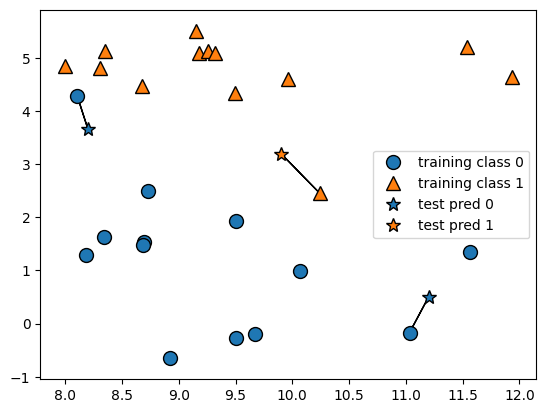

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Powyższy przykład (korzystający ze zbioru forge) ilustruje dopasowanie modelu k-NN przy wskazaniu jednego sąsiada jako parametru. Na wykresie dodaliśmy trzy nowe punkty (w formie gwiazdek, której kolor odpowiada wynikowi przewidywania). Dla każdego z nich dopasowany został jeden najbliższy punkt sąsiadujący, którego etykieta jest wynikiem predykcji.

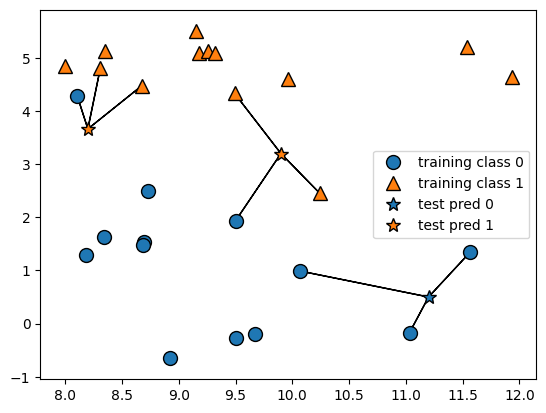

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Jednak, zamiast wybierać tylko jednego sąsiada, można brać pod uwagę dowolną liczbę sąsiadów - czyli k (parametr n_neighbors). Gdy uwzględniamy więcej niż jednego sąsiada, algorytm stosuje mechanizm głosowania i dla każdego z punktów liczy, do której z klas przynależy większa liczba sąsiadów. Klasa przeważająca jest tą przypisaną w prognozie.

Algorytm ten można z równym powodzeniem stosować do klasyfikacji binarnej, jak i wieloklasowej. W przypadku większej liczby klas ponownie liczymy, ilu sąsiadów należy do danej klasy, i wybieramy najczęściej w tym podzbiorze reprezentowaną klasę.

A jak wygląda implementacja tego modelu w scikit-learn? Zacznijmy od podział na zbiór treningowy i testowy.

In [17]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Importujemy klasę i tworzymy jej instancję, możemy określić parametry dla tejże instancji.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

Następnie dopasowujemy model do zestawu treningowego. W przypadku tej konkretnej klasy oznacza to przechowywanie zestawu danych, aby je wykorzystać do prognozowania.

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Aby tworzyć prognozy, należy skorzystać z metody predict. Dla każdego punktu w zbiorze testowym wskazuje się jego najbliższych sąsiadów i typuje spośród nich najbardziej powszechną klasę.

In [20]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


Dla oceny tego, jak model radzi sobie z uogólnianiem, wybieramy metodę score z danymi testowymi i ich faktycznymi etykietami. Dokładność (accuracy) modelu wynosi ok. 0,86.

In [21]:
print(f"Test set accuracy: {clf.score(X_test, y_test)}")

Test set accuracy: 0.8571428571428571


Dla zestawów danych o dwóch wymiarach możemy również zilustrować prognozowanie dla wszystkich możliwych punktów testowych na płaszczyźnie XY - kolorujemy ją zgodnie z klasą, która byłaby przypisana do punktu w tym regionie, dzięki czemu mamy zarysowaną granicę decyzyjną, oddzielającą przestrzenie, w których algorytm przypisuje klasy próbkom danych.

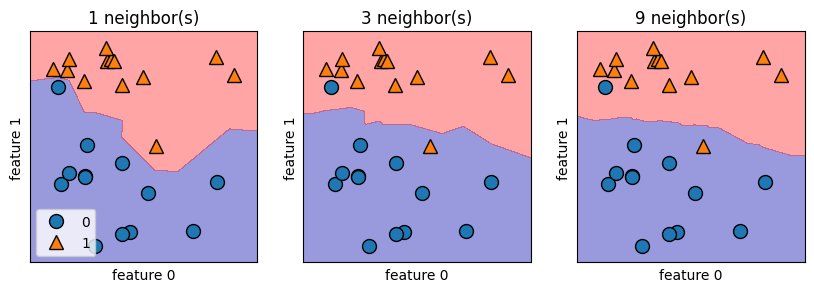

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Widoczne jest, że użycie jednego sąsiada skutkuje tym, że wytyczona granica decyzyjna jest ściśle zgodna z danymi uczącymi. Im większą liczbę sąsiadów uwzględniamy, tym gładsza jest ta granica. Tym samym model wydaje się być mniej złożony, a co za tym idzie, bardziej uogólniający. Zasadą jest więc to, że model jest tym bardziej złożony, im mniej sąsiadów użyto do przewidywania. Skrajny przypadek to wskazanie tylu sąsiadów, ile jest próbek danych w zbiorze treningowym - wówczas wszystkie próbki będą miały tych samych sąsiadów, przez co prognozy byłyby takie same: klasa najczęściej występująca w zbiorze uczącym.

Na rzeczywistym zestawie cancer zbadamy, czy ww. wniosek o złożoności modelu można potwierdzić. Najpierw jednak ocenimy jakość jego uczenia i przetestujemy wydajność z różną liczbą sąsiadów.

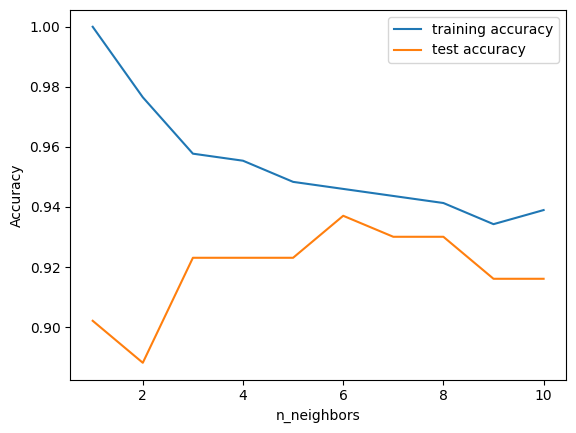

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Prognoza jest doskonała, gdyby wziąć pod uwagę prognozę algorytmu z jednym sąsiadem na zbiorze uczącym. Gdy jednak weźmiemy pod uwagę większą liczbę sąsiadów, model staje się mniej złożony. Dokładność uczenia spada, ale lepiej wygląda zdolność do uogólniania. Optymalny punkt przewidywania znajduje się mniej więcej na poziomie sześciu sąsiadów. Najgorsza wydajność występuje przy dokładności ok. 0,88.

## Regresja k-sąsiadów.

Aby zobaczyć działanie wariantu regresji algorytmu k-najbliższych sąsiadów, używamy zestawu wave. Na osi X dodajemy trzy punkty danych testowych w postaci zielonych gwiazd. Wynik prognozy to - przy zastosowaniu jednego sąsiada - wynik najbardziej zbliżonego punktu.

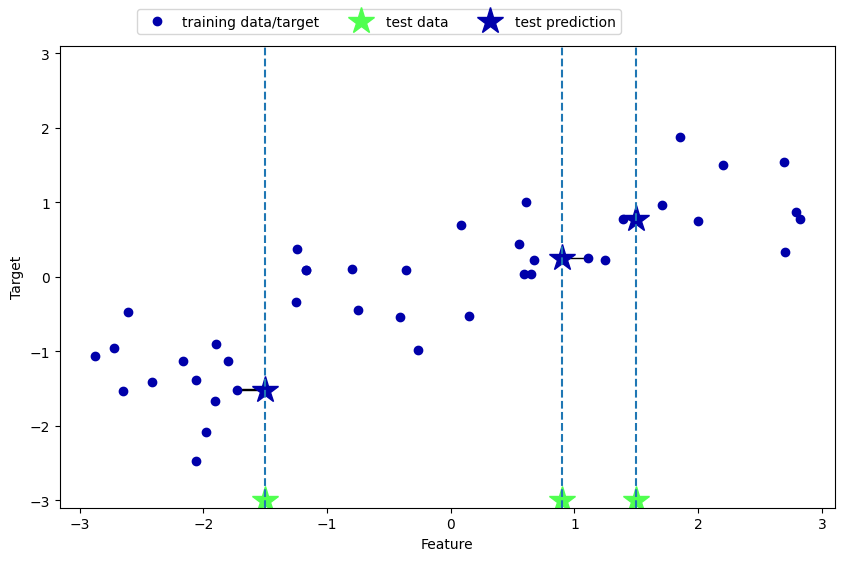

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Kiedy stosujemy wielu najbliższych sąsiadów, wynik prognozy to średnia wartości tychże.

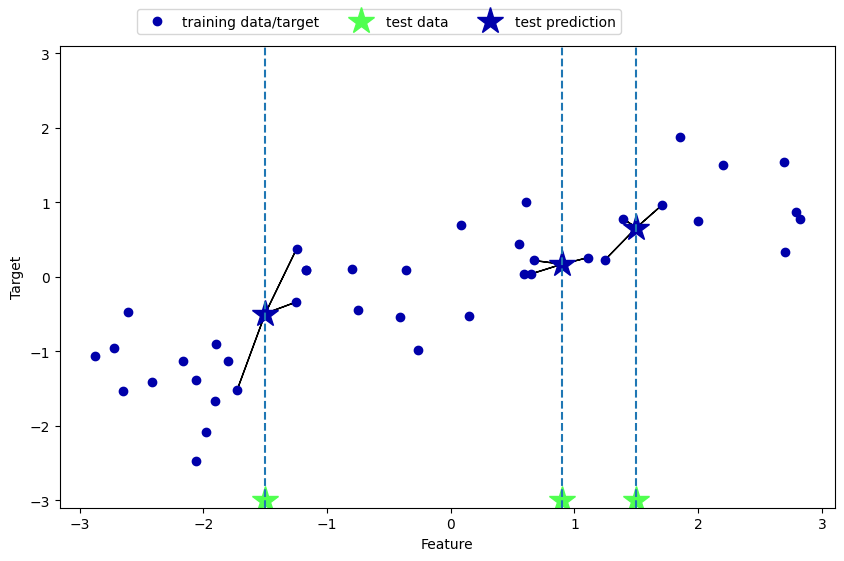

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

W scikit-learn algorytm regresji k-najbliższych sąsiadów jest zaimplementowany w klasie KNeighborsRegressor.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Model możemy również ocenić metodą punktacji, która zwraca dla regresorów współczynnik R^2. Rezultat wynosi ok. 0,834, co wskazuje na stosunkowo dobre dopasowanie modelu regresji.

In [27]:
print(f"Test set R^2: {reg.score(X_test, y_test)}")

Test set R^2: 0.8344172446249605


W przypadku jednowymiarowego zestawu danych można zobaczyć, jak przedstawiają się prognozy dla wszystkich możliwych wartości cech. Gdy używamy tylko jednego sąsiada, model dopasowuje się do danych treningowych, ale przez to bardzo słabo uogólnia. Uwzględnienie większej liczby sąsiadów prowadzi do prognoz mniej dopasowanych do danych uczących, ale za to model ma wyraźnie wyższą zdolność do generalizacji.

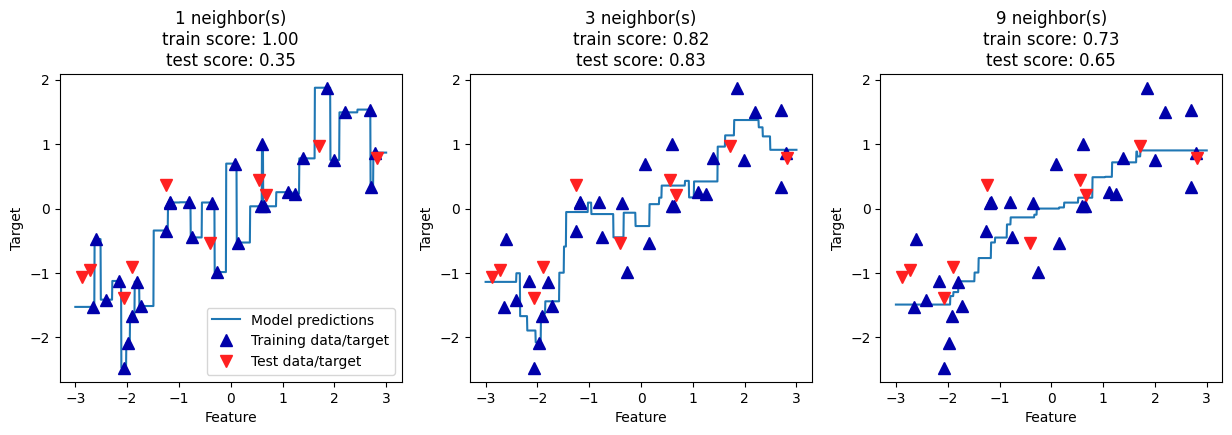

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        f"{n_neighbors} neighbor(s)\n"
        f"train score: {reg.score(X_train, y_train):.2f}\n"
        f"test score: {reg.score(X_test, y_test):.2f}"
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

## Podsumowanie.

Modele k-najbliższych sąsiadów mają co do zasady raptem dwa istotne parametry - liczbę sąsiadów i miarę odległości między punktami (domyślnie - euklidesowa).

Plusy:
- model prosty do zrozumienia,
- rozsądna wydajność bez konieczności zbytniego dostrajania,
- dobry jako metoda wstępnego wypróbowania przed zastosowaniem bardziej zaawansowanych algorytmów,
- na ogół szybki w działaniu.

Minusy:
- może predykować powoli przy większym zbiorze treningowym,
- nie radzi sobie z danymi o dużej liczbie cech lub z rzadkimi zestawami (takimi, w których większość cech ma przez większy czas wartość 0).

# Modele liniowe.

Służą do prognozowania cech wejściowych przy użyciu funkcji liniowej. W praktyce są stosowane od wielu lat.

W przypadku regresji ogólny wzór prognozowania wygląda następująco:

y_pred = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b

gdzie x[0], ... x[p] to cechy w zbiorze posiadającym p cech, w i b to parametry uczonego modelu, a y_pred to prognoza modelu.

W zbiorze z jedną cechą:

y_pred = w[0]x[0] + b

Z punktu widzenia podstawowej matematyki jest to równanie prostej. Współczynnik w[0] reprezentuje nachylenie, zaś b - wyraz wolny - to przesunięcie względem osi Y. Alternatywnie - suma ważona cech wejściowych z wagami opisanymi przez parametry w (mogą być ujemne).


Sprawdźmy działanie regresji liniowej na zestawie danych wave.

w[0]: 0.393906  b: -0.031804


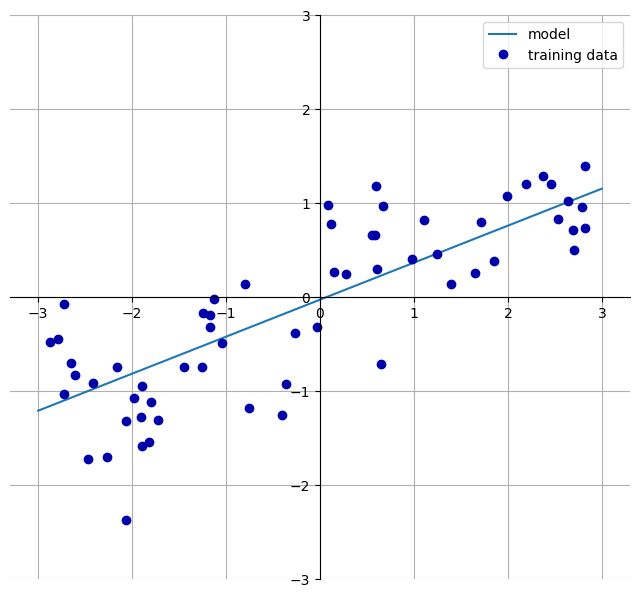

In [29]:
mglearn.plots.plot_linear_regression_wave()

Dodane osie układu współrzędnych ułatwiają zrozumienie przebiegu funkcji. Współczynnik w[0] wynosi ok. 0,4, natomiast b ok. -0,03; współczynnik b to punkt przecięcia prostej z osią Y.

Liniowe modele regresji możemy charakteryzować jako modele, w których wykres prognozy dla pojedynczej cechy jest prostą, a dla >1 cechy - płaszczyzną. Z pozoru tego typu algorytm może wydawać się bardzo ograniczający, powodujący utratę wielu drobnych szczegółów danych. Można tak uznać pod warunkiem założenia, że zmienna zależna jest liniową kombinacją cech. Tak naprawdę jednak te modele wiele zyskują przy predykcji danych z wieloma cechami - mogą się okazać bardzo mocnym narzędziem. Szczególnie jeżeli mamy więcej funkcji niż punktów danych treningowych, możemy cel y idealnie modelować jako funkcję liniową.

A jakie mamy rodzaje regresji liniowej?

## Metoda najmniejszych kwadratów - klasyczna regresja liniowa.

Regresja liniowa, znana też jako metoda najmniejszych kwadratów (ang. OLS - ordinary least squares), jako najprostsza metoda, ma za zadanie odnaleźć takie wartości w i b, aby zminimalizować średni błąd kwadratowy między prognozami a wartościami rzeczywistymi celu regresji - y.

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Parametr nachylenia - w - przechowuje atrybut coef_, zaś wyraz wolny b - intercept_. Atrybut intercept_ ma postać pojedynczej liczby zmiennoprzecinkowej, a coef_ - tablicy NumPy z jednym wpisem na każdą zmienną wejściową.

In [31]:
print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.6700890315075756
Test set score: 0.65933685968637


Wyniki wydajności w obu zbiorach są nieszczególnie satysfakcjonujące, ale w stosunku do zestawu treningowego i testowego są zbliżone. Świadczy to o tym, iż model zmaga się z underfittingiem - niedopasowaniem.

Zestaw danych wave jest jednowymiarowy, więc ryzyko niedopasowania jest nieduże. Przyjrzyjmy się więc działaniu modelu regresji na bardziej złożonym zestawie danych - boston. Przeprowadzimy standardową procedurę - podział zbiorów oraz dopasowanie danych.

In [32]:
X, y = boston
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print(f"Training set score: {lr.score(X_train, y_train)}")
print(f"Test set score: {lr.score(X_test, y_test)}")

Training set score: 0.9520519609032728
Test set score: 0.6074721959665773


Prognozy w zestawie treningowym są bardzo dokładne (R^2 ok. 0,95), ale wynik predykcji dla danych testowych jest znacznie bardziej odbiegający od prawdy. Model wydaje się być znacznie przeuczony, toteż powinniśmy spróbować znaleźć model, który pozwala na kontrolę złożoności.

## Regresja grzbietowa (Ridge).

Jest to odmiana regresji liniowej, w której dąży się do możliwie jak największego ograniczenia współczynników W. Innymi słowy oznacza to, że docelowo każda cecha powinna mieć możliwie najmniejszy wpływ na wynik, ale bez pogorszenia jakości predykcji. Taki zabieg nosi miano regularyzacji - jest to wyraźne ograniczenie modelu w celu zapobieżenia przeuczeniu. W regresji grzbietowej wykorzystywana jest regularyzacja L2.

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print(f"Training set score: {ridge.score(X_train, y_train)}")
print(f"Test set score: {ridge.score(X_test, y_test)}")

Training set score: 0.8857966585170941
Test set score: 0.7527683481744751


Wyniki dla danych testowych są lepsze niż w przypadku regresji liniowej, pomimo słabszych wyników nauki. Model Ridge jest bardziej ograniczony, więc szanse na nadmierne dopasowanie są mniejsze.

Ridge jest uznawane za kompromis między prostotą a wydajnością modelu w zbiorze uczącym. Nacisk na prostotę - tj. współczynnik regularyzacji - może zostać uregulowany parametrem alpha, który domyślnie ma wartość 1,0. Optymalne ustawienie tego parametru jest jednak zależne od konkretnego zbioru danych. Im większa wartość, tym większe zbliżenie wartości współczynników do zera, co może zmniejszać wydajność modelu, ale jednocześnie pomóc w uogólnianiu.

W wypadku parametru alpha = 10 predykcje są bardzo niedokładne.

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train)}")
print(f"Test set score: {ridge10.score(X_test, y_test)})")

Training set score: 0.7882787115369614
Test set score: 0.635941148917731)


Zmniejszenie parametru alpha pozwala na mniejsze ograniczanie współczynników.

In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train)}")
print(f"Test set score: {ridge01.score(X_test, y_test)}")

Training set score: 0.9282273685001992
Test set score: 0.7722067936479814


Poniższy wykres pozwoli na wgląd w to, jak parametr alpha zmienia model. Patrzymy na atrybut coef_attribute w modelach o różnych wartościach alpha. Zdecydowanie widać, że wartości atrybutu są bardziej zbliżone do zera, jeżeli alpha jest wysoka.

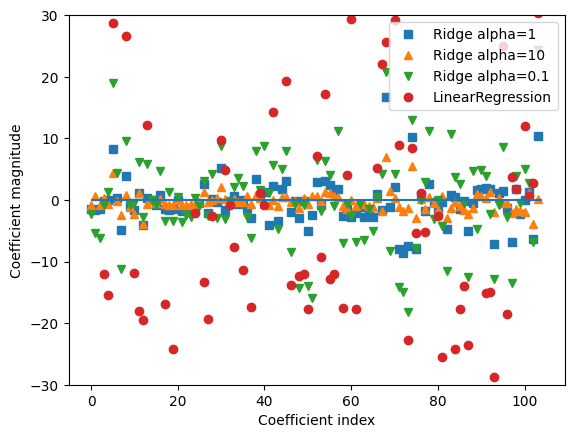

In [36]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-30, 30)
plt.legend()

Oś X oznacza wpisy coef_, gdzie x = 0 pokazuje współczynnik 1. cechy, x = 1 - współczynnik drugiej cechy, x = 100 - setnej itd. Oś Y oznacza zaś wartości liczbowe dla poszczególnych współczynników.

Innym sposobem zrozumienia wpływu regularyzacji na uczenie modelu jest ustalenie stałej wartości alpha i regulacja zasobu dostępnych danych treningowych. Wydzielmy więc część z zestawu danych uczących i oceńmy regresję liniową oraz grzbietową na stopniowo rosnących zbiorach. Uzyskamy w ten sposób tzw. krzywą uczenia - wykres przedstawiający wydajność modelu w miarę, jak zestaw uczący rośnie.

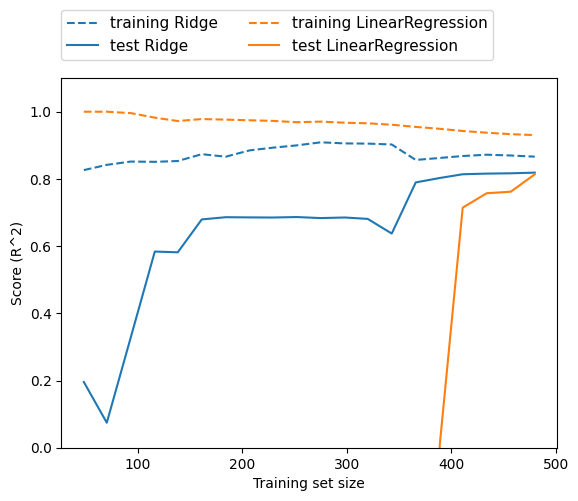

In [37]:
mglearn.plots.plot_ridge_n_samples()

Dla każdego rozmiaru zbioru treningowego wynik uczenia jest wyższy niż wynik testu. Ponieważ model Ridge jest uregulowany, wynik jego uczenia jest niższy niż wynik uczenia dla regresji liniowej. Jednak z drugiej strony model ten ma lepsze wyniki testu dla każdego rozmiaru zbioru. W miarę, jak rozmiar danych uczących rośnie, regresja liniowa dogania w uogólnianiu regresję grzbietową. Płynie z tego wniosek, że regularyzacja staje się tym mniej istotna, im większy rozmiar danych treningowych. Co też ciekawe, z tymże wzrostem maleje wydajność uczenia modelu regresji liniowej - im więcej danych, tym trudniej modelowi nadmiernie dopasować się do nich.

## Regresja Lasso.

Model alternatywny dla Ridge. Podobnie do niego, użycie go ogranicza współczynniki o bliskich zeru, jednakże poprzez wprowadzenie funkcji kary opartej na bezwględnych wartościach współczynników. Metoda ta może sprawiać, że współczynniki będą dokładnie zerowe, a więc je de facto eliminować. Posiadanie niektórych współczynników równych zeru może ułatwić interpretację modelu i uwypuklić jego najważniejsze cechy.

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of features used: 4


Model Lasso z domyślnymi parametrami nie radzi sobie dobrze. Wydaje się być to powodem niedopasowania i użycia tylko 4 ze 105 cech. Podobnie jak w przypadku regresji Ridge, spróbujmy dopasować parametr alpha, który kontroluje odchylenie współczynników od 0 (domyślnie 1,0). Ustawiając go na inną wartość, zmieńmy również domyślne ustawienie parametru max_iter.

In [39]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train)}")
print(f"Test set score {lasso001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.8962226511086497
Test set score 0.7656571174549982
Number of features used: 33


Niższy parametr alpha to bardziej złożony model z lepszym działaniem na danych testowych - używamy więcej cech, wydajność wzrosła.

Musimy jednak uważać - zbyt niski parametr alpha to de facto usunięcie efektu regularyzacji, co może poskutkować overfittingiem modelu, z wynikiem zbliżonym do regresji liniowej z domyślnymi parametrami.

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train)}")
print(f"Test set score: {lasso00001.score(X_test, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.9507158754515463
Test set score: 0.6437467421272821
Number of features used: 96


Ponownie określmy współczynniki różnych modeli.

Text(0, 0.5, 'Coefficient magnitude')

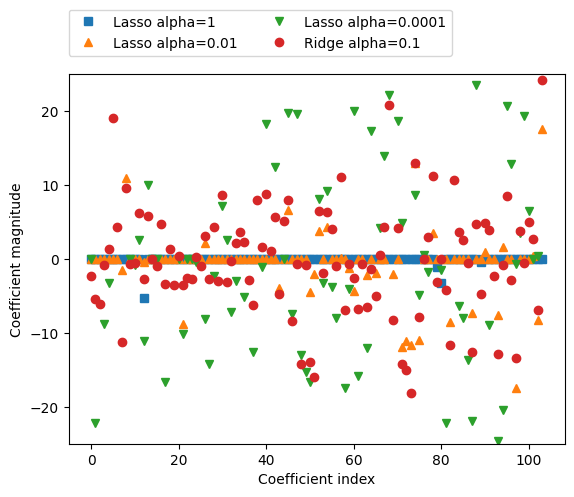

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Dla alpha=1 większość współczynników ma wartość równą 0, ale i pozostałe współczynniki są niewielkie. Im niższa wartość alpha, tym więcej współczynników różnych od zera. Najniższa wartość alpha to już model stosunkowo nieregularny, z dużymi wartościami współczynników. Model Ridge z wartością alpha=0,1 ma zbliżoną wydajność do Lasso z alpha=0,01, choć w przeciwieństwie do tego drugiego nie występują zerowe współczynniki.

W praktyce to regresja Ridge jest tą częściej stosowaną niż Lasso. Jednak przy dużej liczbie funkcji, spośród których dużo nie będzie brane pod uwagę, Lasso może być lepszym wyborem. Algorytm ten jest również łatwiejszy do interpretacji.

W bibliotece scikit-learn znajduje się również klasa ElasticNet, która łączy funkcje kary Lasso i Ridge. W praktyce to ta kombinacja może działać najlepiej, lecz wymaga dostosowania obu regularyzacji.

In [42]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet().fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.32837814485847916
Test set score: 0.2217004367773664


In [43]:
elasticnet = ElasticNet(alpha=0.25).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.6164316708602853
Test set score: 0.44278536562061077


In [44]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.1, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.7029876989318095
Test set score: 0.5262167632204025


In [45]:
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.01, max_iter=100000).fit(X_train, y_train)
print(f"Training set score: {elasticnet.score(X_train, y_train)}")
print(f"Test set score: {elasticnet.score(X_test, y_test)}")

Training set score: 0.8354130942973717
Test set score: 0.6975708356955143
